In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df =  pd.read_excel('/content/Stress_Anxiety_cleaned_data set.xlsx')
df.head()

,Unnamed: 0,Timestamp,Age,Gender,Stress_level,Work_stress,Financial_stress,Health_issues,Family_problems,Social_stress,Educational_stress,Life_changes,Technology_overload,Cultural_stress,Personal_habits,Country
0,0,2024-07-04 12:38:08.261,28,Female,5,2,5,2,1,4,3,5,3,1,1,Canada
1,1,2024-07-04 12:45:22.941,28,Male,5,3,5,4,3,3,5,5,2,3,5,Canada
2,2,2024-07-04 12:53:16.880,28,Female,5,5,5,1,1,4,2,5,3,1,1,Canada
3,3,2024-07-04 12:55:56.942,28,Male,5,3,5,4,3,3,5,5,2,3,4,Canada
4,4,2024-07-04 12:56:44.052,33,Male,2,2,3,3,3,2,1,3,3,5,4,Canada


In [20]:
df.describe()

,Unnamed: 0,Timestamp,Age,Stress_level,Work_stress,Financial_stress,Health_issues,Family_problems,Social_stress,Educational_stress,Life_changes,Technology_overload,Cultural_stress,Personal_habits
count,50.00000,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,24.50000,2024-07-04 20:30:35.454199808,30.440000,3.300000,2.840000,3.440000,2.520000,2.580000,2.380000,2.640000,3.120000,2.240000,2.30000,2.360000
min,0.00000,2024-07-04 12:38:08.261000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,12.25000,2024-07-04 14:02:13.751249920,28.000000,3.000000,2.000000,3.000000,2.000000,1.250000,1.250000,2.000000,2.000000,1.250000,1.00000,1.000000
50%,24.50000,2024-07-04 19:34:58.976000,29.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.00000,2.000000
75%,36.75000,2024-07-04 23:39:43.642500096,33.000000,4.000000,3.000000,4.000000,3.000000,3.750000,3.000000,3.750000,4.000000,3.000000,3.00000,3.000000
max,49.00000,2024-07-05 10:45:52.343000,45.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.00000,5.000000
std,14.57738,NaN,5.353465,1.015191,1.075895,1.090965,0.952762,1.213697,1.007928,1.289835,1.255843,1.041192,1.19949,1.273914


By looking at the above data, we can see that the mean stress level among all 50 samples despite the gender is 3.3. Let's look at the stress level data based on the gender

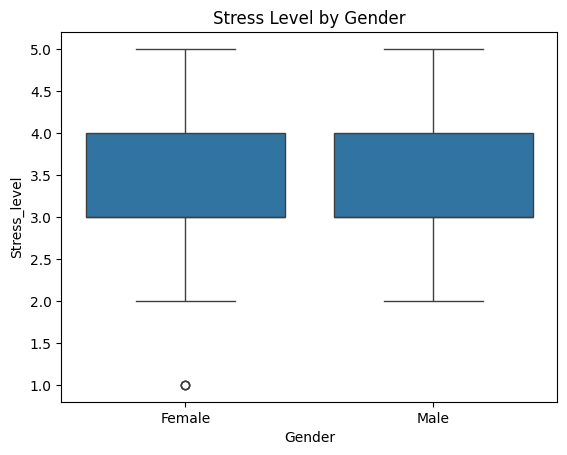

In [21]:
sns.boxplot(x='Gender', y='Stress_level', data=df)
plt.title('Stress Level by Gender')
plt.show()

In [22]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Age', 'Gender', 'Stress_level',
       'Work_stress', 'Financial_stress', 'Health_issues', 'Family_problems',
       'Social_stress', 'Educational_stress', 'Life_changes',
       'Technology_overload', 'Cultural_stress', 'Personal_habits', 'Country'],
      dtype='object')

In [23]:
factors =df[['Work_stress', 'Financial_stress', 'Health_issues', 'Family_problems',
       'Social_stress', 'Educational_stress', 'Life_changes',
       'Technology_overload', 'Cultural_stress', 'Personal_habits','Stress_level']]
stress_group = factors.groupby('Stress_level').mean()

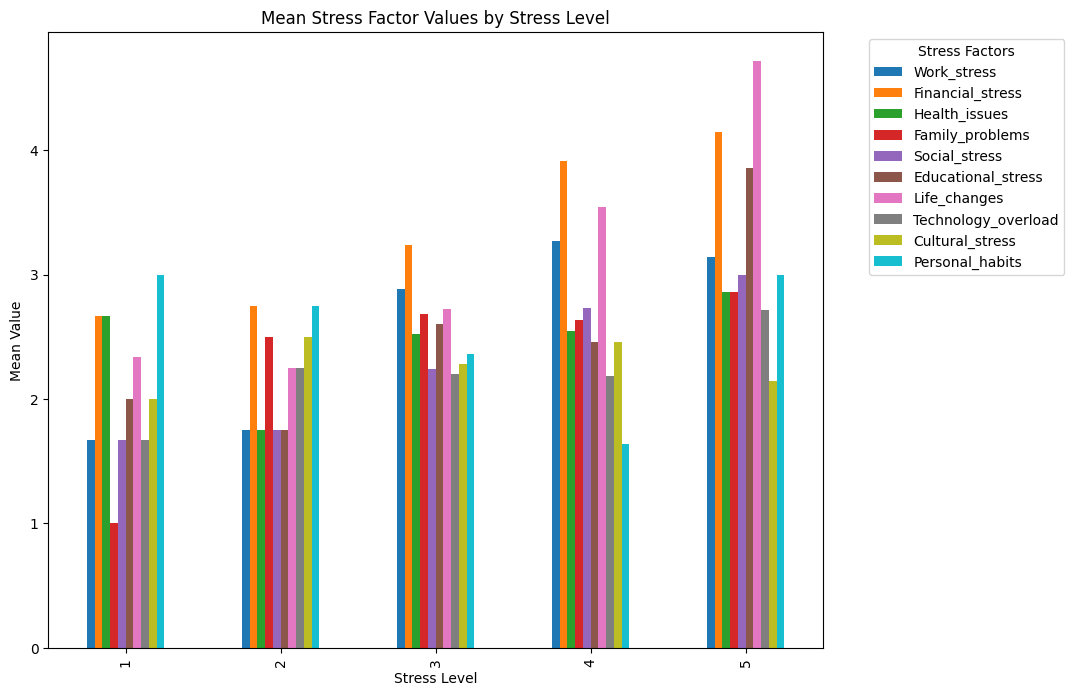

In [24]:
stress_group.plot(kind='bar', figsize=(10, 8))
plt.title('Mean Stress Factor Values by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Mean Value')
plt.legend(title='Stress Factors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

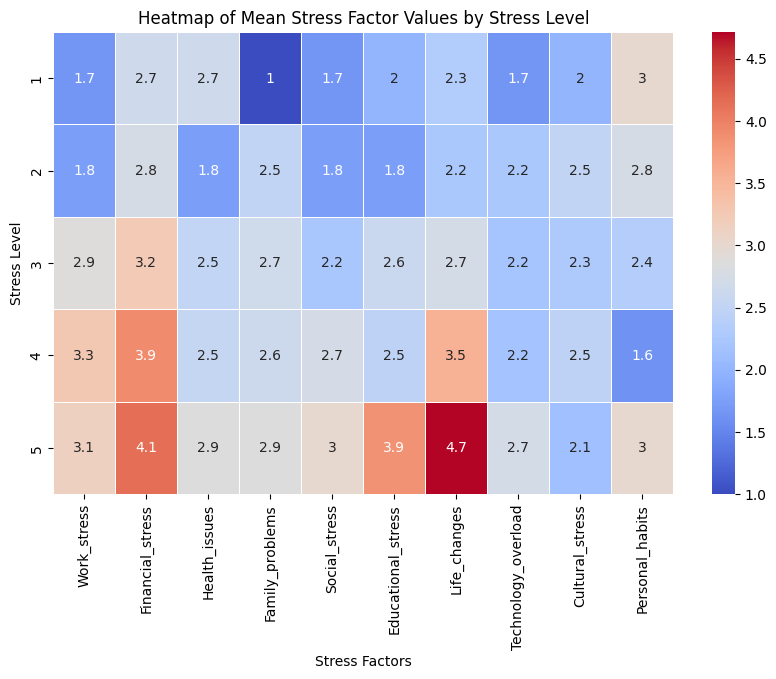

In [25]:
# Plot heatmap of the mean values
plt.figure(figsize=(10, 6))
sns.heatmap(stress_group, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Mean Stress Factor Values by Stress Level')
plt.xlabel('Stress Factors')
plt.ylabel('Stress Level')
plt.show()

## Box Plot Analysis

In [26]:
stress_factors =df[['Work_stress', 'Financial_stress', 'Health_issues', 'Family_problems',
       'Social_stress', 'Educational_stress', 'Life_changes',
       'Technology_overload', 'Cultural_stress', 'Personal_habits']]

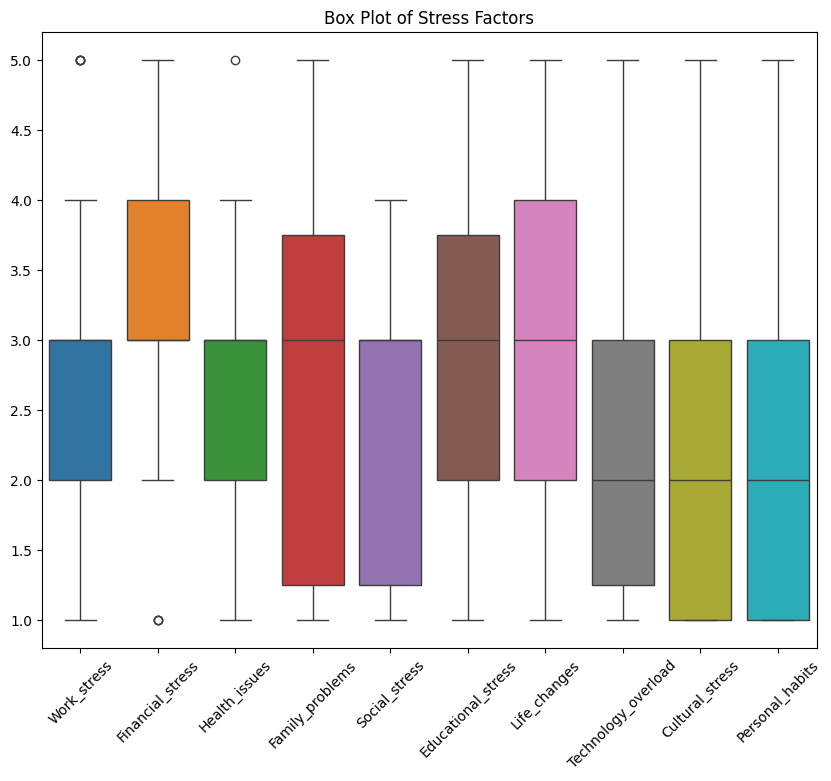

In [27]:
# Plot box plots for each stress factor
plt.figure(figsize=(10, 8))
sns.boxplot(data=stress_factors)
plt.title('Box Plot of Stress Factors')
plt.xticks(rotation=45)
plt.show()

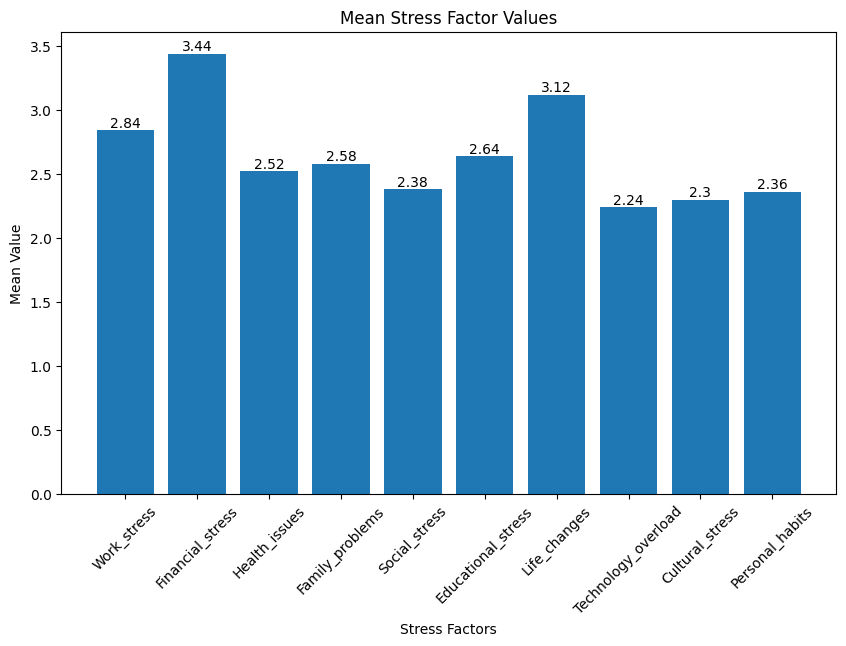

In [28]:
from inspect import Attribute
y = stress_factors.mean()
x = stress_factors.columns
plt.figure(figsize=(10, 6))
plt.bar(x, y, width=0.8)
plt.title('Mean Stress Factor Values')
plt.xlabel('Stress Factors')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)

for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), ha='center', va='bottom')

plt.show()

## We can see that the financial stress is the largest stress factor among the sample data I have collected.

## Correlation Analysis

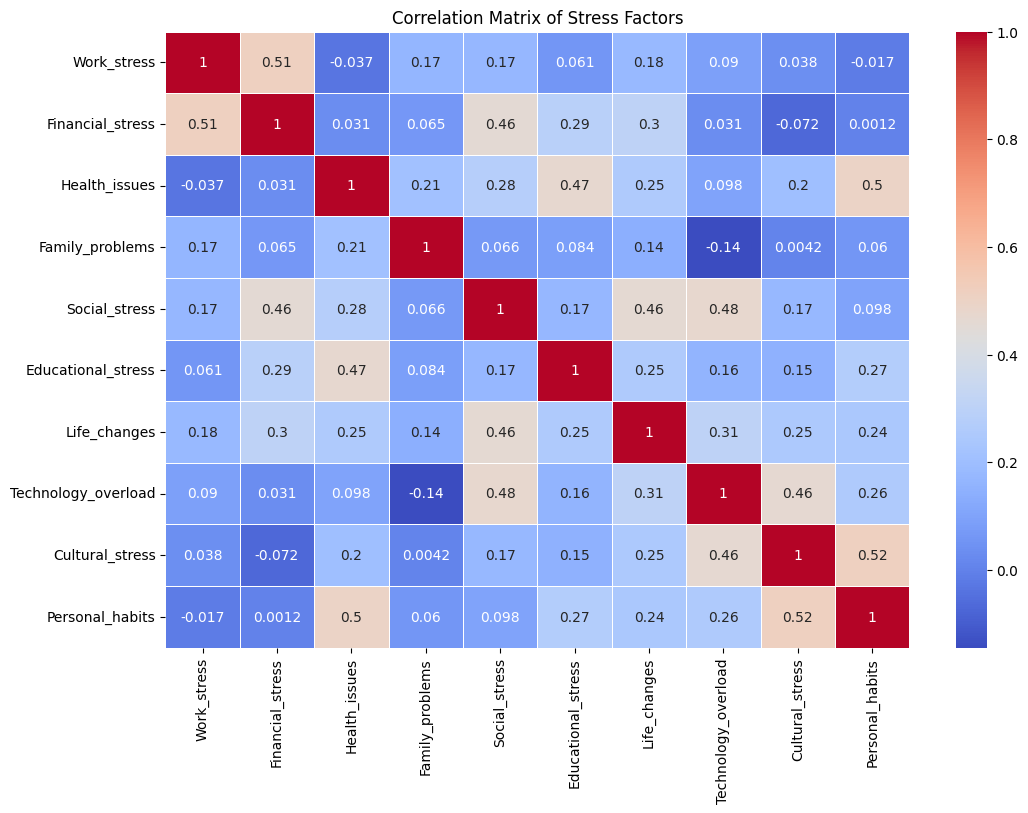

In [29]:
# Calculate correlation matrix
correlation_matrix = stress_factors.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stress Factors')
plt.show()


## Distribution Analysis

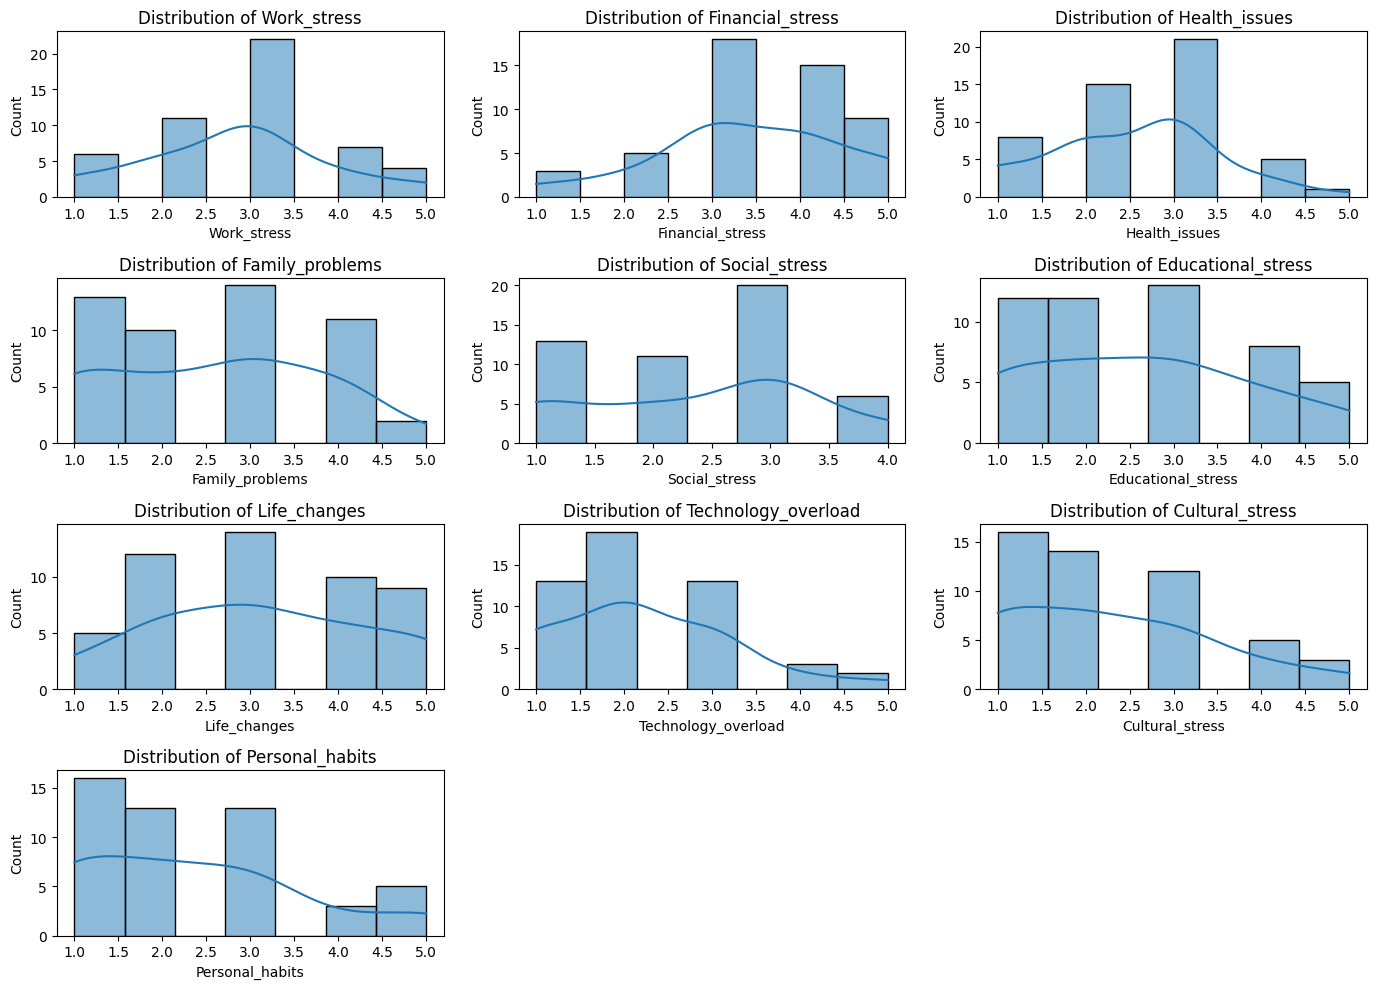

In [30]:
# Plot distribution for each stress factor
plt.figure(figsize=(14, 10))
for i, column in enumerate(stress_factors.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(stress_factors[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Let's find out the most stressed age of the sample I have collected

In [31]:
#calculating a value for to collect insights about the overall stress level of the individuals

for col in stress_factors.columns:
    Toatl_stress = stress_factors.sum(axis=1)
    df['Total_stress value'] = Toatl_stress


In [32]:
df.head()

,Unnamed: 0,Timestamp,Age,Gender,Stress_level,Work_stress,Financial_stress,Health_issues,Family_problems,Social_stress,Educational_stress,Life_changes,Technology_overload,Cultural_stress,Personal_habits,Country,Total_stress value
0,0,2024-07-04 12:38:08.261,28,Female,5,2,5,2,1,4,3,5,3,1,1,Canada,27
1,1,2024-07-04 12:45:22.941,28,Male,5,3,5,4,3,3,5,5,2,3,5,Canada,38
2,2,2024-07-04 12:53:16.880,28,Female,5,5,5,1,1,4,2,5,3,1,1,Canada,28
3,3,2024-07-04 12:55:56.942,28,Male,5,3,5,4,3,3,5,5,2,3,4,Canada,37
4,4,2024-07-04 12:56:44.052,33,Male,2,2,3,3,3,2,1,3,3,5,4,Canada,29


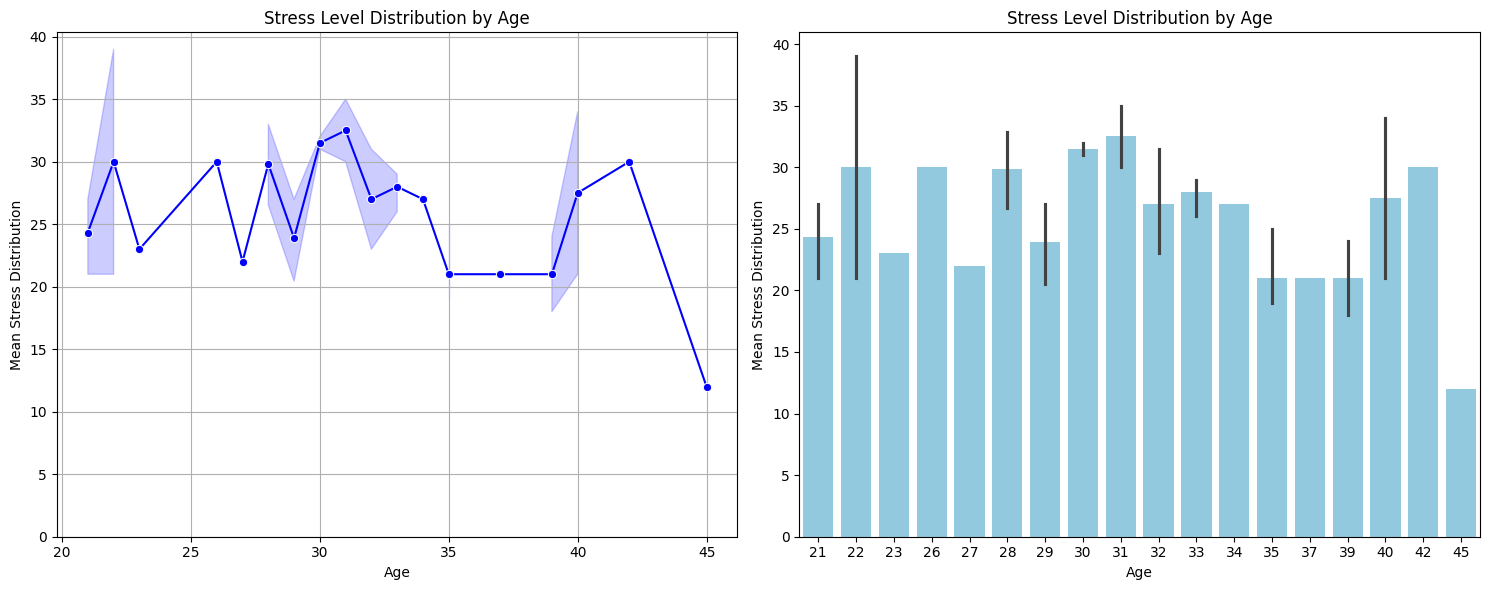

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#plotting the line plot(left subplot)
sns.lineplot(x='Age', y='Total_stress value', data=df, marker='o', color='b', ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Mean Stress Distribution')
ax1.set_title('Stress Level Distribution by Age')
ax1.set_ylim(0, None)  # Set the lower limit of y-axis to 0
ax1.grid(True)

# Plotting bar plot (right subplot)
sns.barplot(x='Age', y='Total_stress value', data=df, ax=ax2, color='skyblue')
ax2.set_xlabel('Age')
ax2.set_ylabel('Mean Stress Distribution')
ax2.set_title('Stress Level Distribution by Age')


plt.tight_layout()
plt.show()


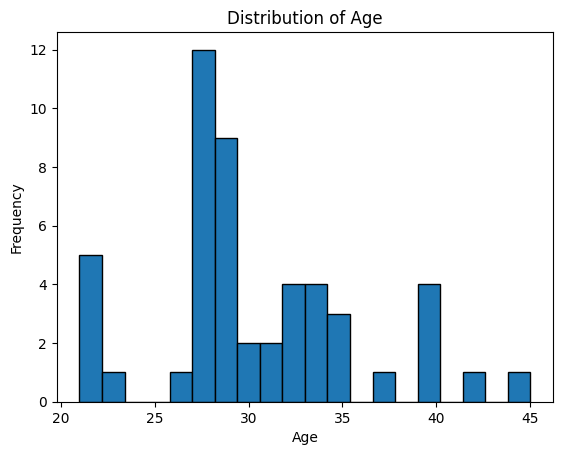

In [34]:
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

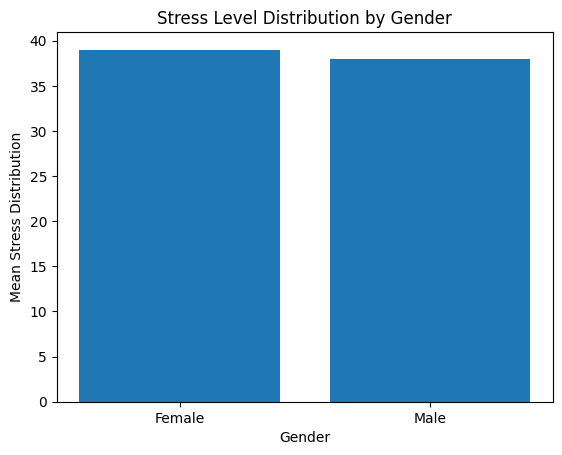

In [35]:
plt.bar(df['Gender'], df['Total_stress value'])
plt.xlabel('Gender')
plt.ylabel('Mean Stress Distribution')
plt.title('Stress Level Distribution by Gender')
plt.show()

## Let's find out what makes the age 22 more stressed out

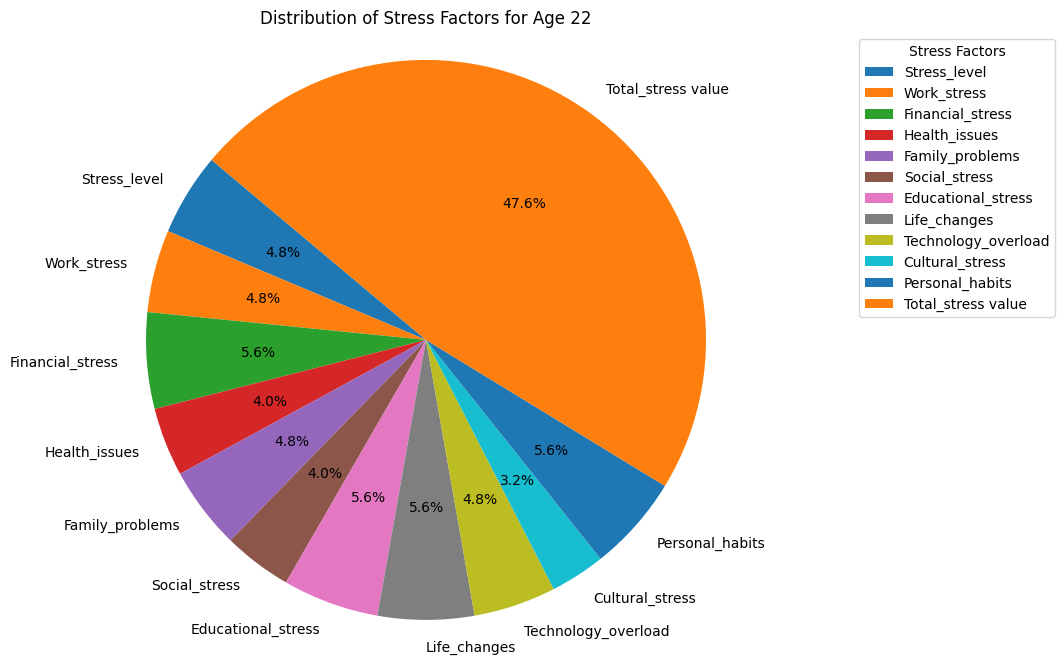

In [56]:
age_22_df = df[df['Age'] == 22]
stress_factors = age_22_df.drop(['Age','Country','Gender','Timestamp','Unnamed: 0'], axis=1).mean()
plt.figure(figsize=(10, 8))
plt.pie(stress_factors, labels=stress_factors.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Stress Factors for Age 22')
plt.axis('equal')
plt.legend(title='Stress Factors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()